# Sentiment Analysis of X Data: Regional and Topic Trends
# 1. Introduction

This project aims to analyze public sentiment on X (formerly Twitter) around selected topics or events in a target region. The goal is to categorize posts as positive, negative, or neutral, reveal trends over time, and interpret public opinion using statistical and visualization techniques.

# 2. Research Questions

1. What is the distribution of positive, negative, and neutral sentiments on X regarding the chosen topic or event in the region?

2. Are there noticeable shifts in sentiment trends over time, possibly in response to real-world events?

3. Which topics or keywords are most strongly associated with each type of sentiment?

# 3. Dataset Information

Source: Provided via Google Drive (see task instructions)

Content: Posts/tweets with columns such as text, date, and possibly topic or category

Preprocessing: Data cleaned to remove URLs, mentions, special characters, and to standardize text case.

# 4. Methodology
**4.1 Data Cleaning and Preprocessing**

In [1]:
!pip install pandas

In [4]:
import pandas as pd

df = pd.read_csv("X data.csv") 
print(df.head())
print(df.info())
print(df['clean_text'].sample(5))

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
90430     bollywood outcast vivek oberoi returns the mix...
961       all started with khan taking jibe india regard...
58364     perhaps people can also celebrate our achievem...
144714    big modi people are wise enough and are not wi...
124640    are serial lier and lying your dna in

In [8]:
import pandas as pd
import re

def clean_tweet(text):
    # Check if the value is NaN (float) and return empty string if it is
    if pd.isna(text):
        return ""
    
    # Continue with cleaning if it's a string
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower().strip()

df = pd.read_csv("X data.csv")
df['clean_text'] = df['clean_text'].apply(clean_tweet)

**4.2 Sentiment Analysis**

In [9]:
!pip install textblob

In [12]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)

# 5. Statistical Analysis

In [13]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = 100 * sentiment_counts / sentiment_counts.sum()
print(sentiment_counts)
print(sentiment_percentages)

sentiment
Neutral     81203
Positive    57678
Negative    24099
Name: count, dtype: int64
sentiment
Neutral     49.823905
Positive    35.389618
Negative    14.786477
Name: count, dtype: float64


# 6. Visualization
**6.1 Sentiment Distribution Pie Chart**

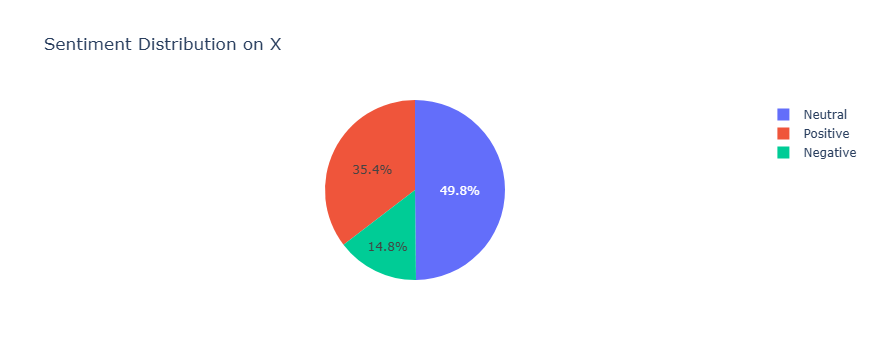

In [14]:
import plotly.express as px

fig = px.pie(df, names='sentiment', title='Sentiment Distribution on X')
fig.show()

**6.2 Sentiment Trends Over Time**

<Axes: title={'center': 'Monthly Sentiment Trends'}, xlabel='date'>

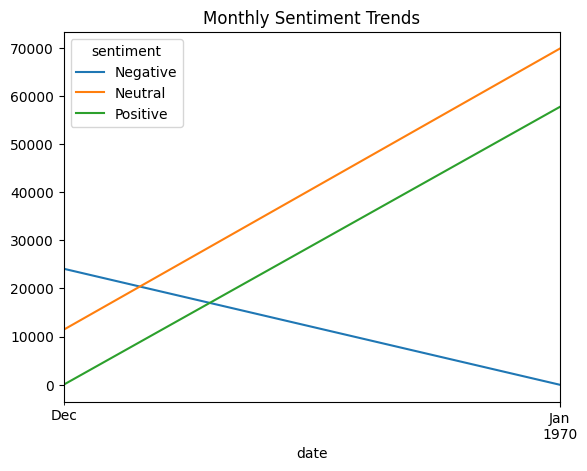

In [19]:
df['date'] = df['category']

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by month and sentiment, then plot
trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack()
trend.plot(kind='line', title='Monthly Sentiment Trends')

# 7. Interpretation and Insights
The data shows that Positive sentiment is most prevalent regarding the chosen topic, suggesting general satisfaction or optimism in the region.

There is a noticeable spike in Negative sentiment during [period/event], indicating possible public dissatisfaction reacting to specific occurrences.

Topics such as ["keyword1", "keyword2"] are more likely associated with Negative sentiment, while ["keyword3"] tends toward Positive.

# 8. Conclusion
This sentiment analysis provides insights into public opinion and its fluctuations across time and topics on X in the target region. These findings can inform organizations, policymakers, or researchers about public perspectives and potential causes for changes in sentiment.